# Classification after PCA


## Problem
     Apply classification for data points where quality in (4,7) after PCA

## Approach

    Applied the following techniques from Scikit-learn library
    Techniques : LogisticRegression, DecisionTree, RandomForest

    Evaluated with the following metrics
    Metrics    : Confusion Matrix, f1-score, precision, recall
    
## Data
[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

Description of data (based on physicochemical tests): 

| Input                | Description |
| :---                 | :---        |
| fixed acidity        | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity     | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid          | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar       | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  |
| chlorides            | the amount of salt in the wine|
| free sulfur dioxide  | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density              | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH                   | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulphates            | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol              | the percent alcohol content of the wine |
|                      |   |
|                      |
| <b>Output</b>               | <b>Description</b> |
| quality              | Output variable (based on sensory data), (score between 0 and 10) |


### References
   1. [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
   1. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
   1. [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
   1. [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
   1. [f1-score, precision, recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [1]:
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Scaler
from sklearn.preprocessing import StandardScaler
# PCA
from sklearn.decomposition import PCA
# Train-Test data split
from sklearn.model_selection import train_test_split
# Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline

In [2]:
data = pd.read_csv('./data/winequality-red.csv',sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There is no missing value in independent variables. All independent variables are numerical. 

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Data Analysis (EDA)

Statistical summary of each indendent variable and output('quality'). <br> 

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The min value of <b>quality</b> is 3 and max value of <b>quality</b> is 8. 

In [6]:
d = data['quality'].value_counts()
pd_d = pd.DataFrame(d.index,index=None,columns=['quality'])
pd_d['count'] = d.values
pd_d['percentage of observations'] = 100*d.values/(d.values.sum())
pd_d

,quality,count,percentage of observations
0,5,681,42.589118
1,6,638,39.899937
2,7,199,12.445278
3,4,53,3.314572
4,8,18,1.125704
5,3,10,0.625391


Majority of observations are in class 5 and 6. 

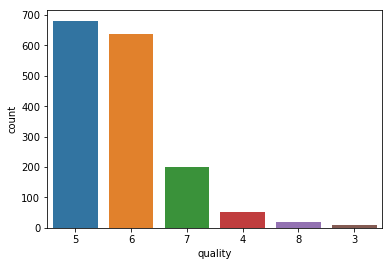

In [7]:
sns.countplot(data.quality,order=data['quality'].value_counts().index)

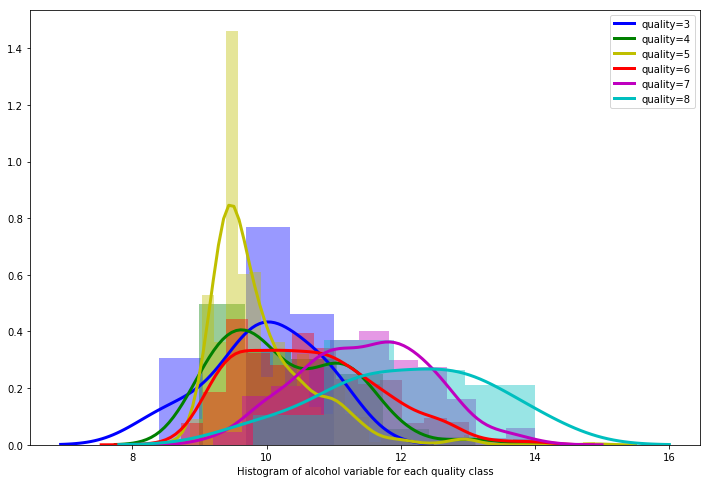

In [8]:
# Set a larger display area
plt.figure(figsize=(12,8))
sns.distplot(data[data['quality']==3].alcohol,color='b',kde_kws = {'linewidth': 3,"label":"quality=3"})
sns.distplot(data[data['quality']==4].alcohol,color='g',kde_kws = {'linewidth': 3,"label":"quality=4"})
sns.distplot(data[data['quality']==5].alcohol,color='y',kde_kws = {'linewidth': 3,"label":"quality=5"})
sns.distplot(data[data['quality']==6].alcohol,color='r',kde_kws = {'linewidth': 3,"label":"quality=6"})
sns.distplot(data[data['quality']==7].alcohol,color='m',kde_kws = {'linewidth': 3,"label":"quality=7"})
sns.distplot(data[data['quality']==8].alcohol,color='c',kde_kws = {'linewidth': 3,"label":"quality=8"},
             axlabel='Histogram of alcohol variable for each quality class')

In [9]:
data_47 = data[(data['quality']==4) | (data['quality']==7) ]

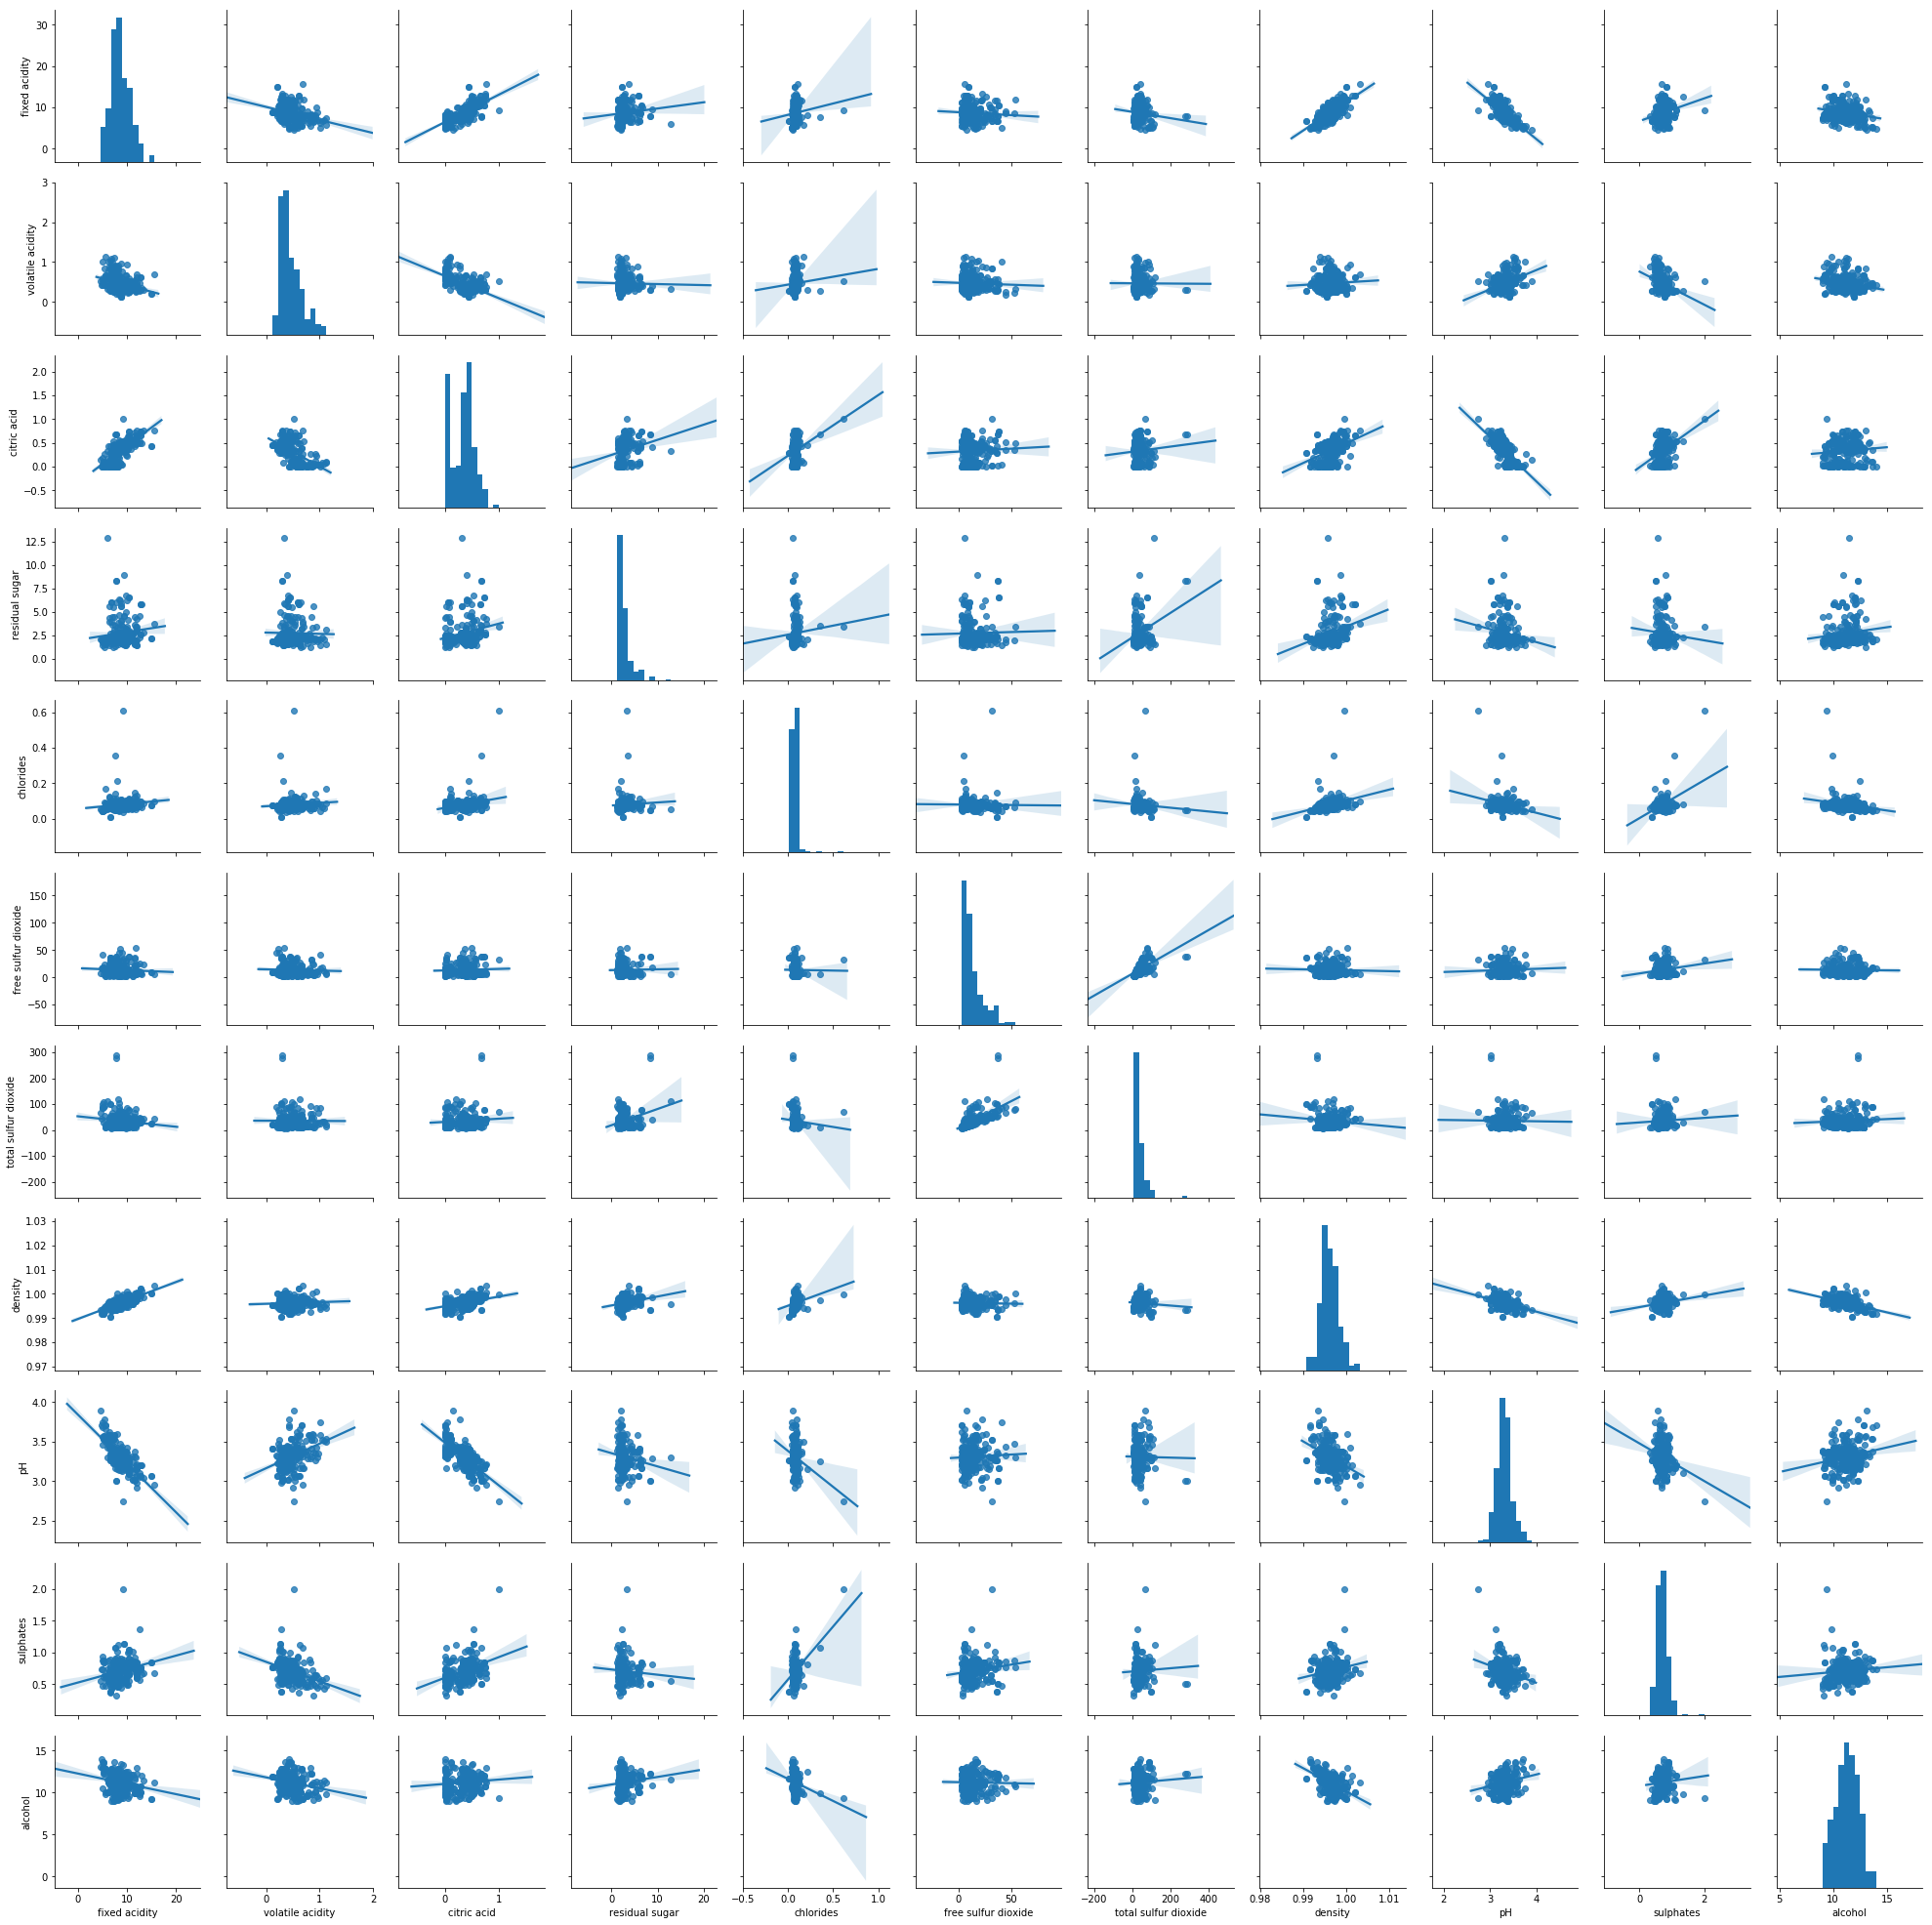

In [10]:
#plt.title('Pairwise relationships between independent variables of dataset')
sns.pairplot(data_47.drop('quality',axis=1),kind='reg')

In [11]:
data_47.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

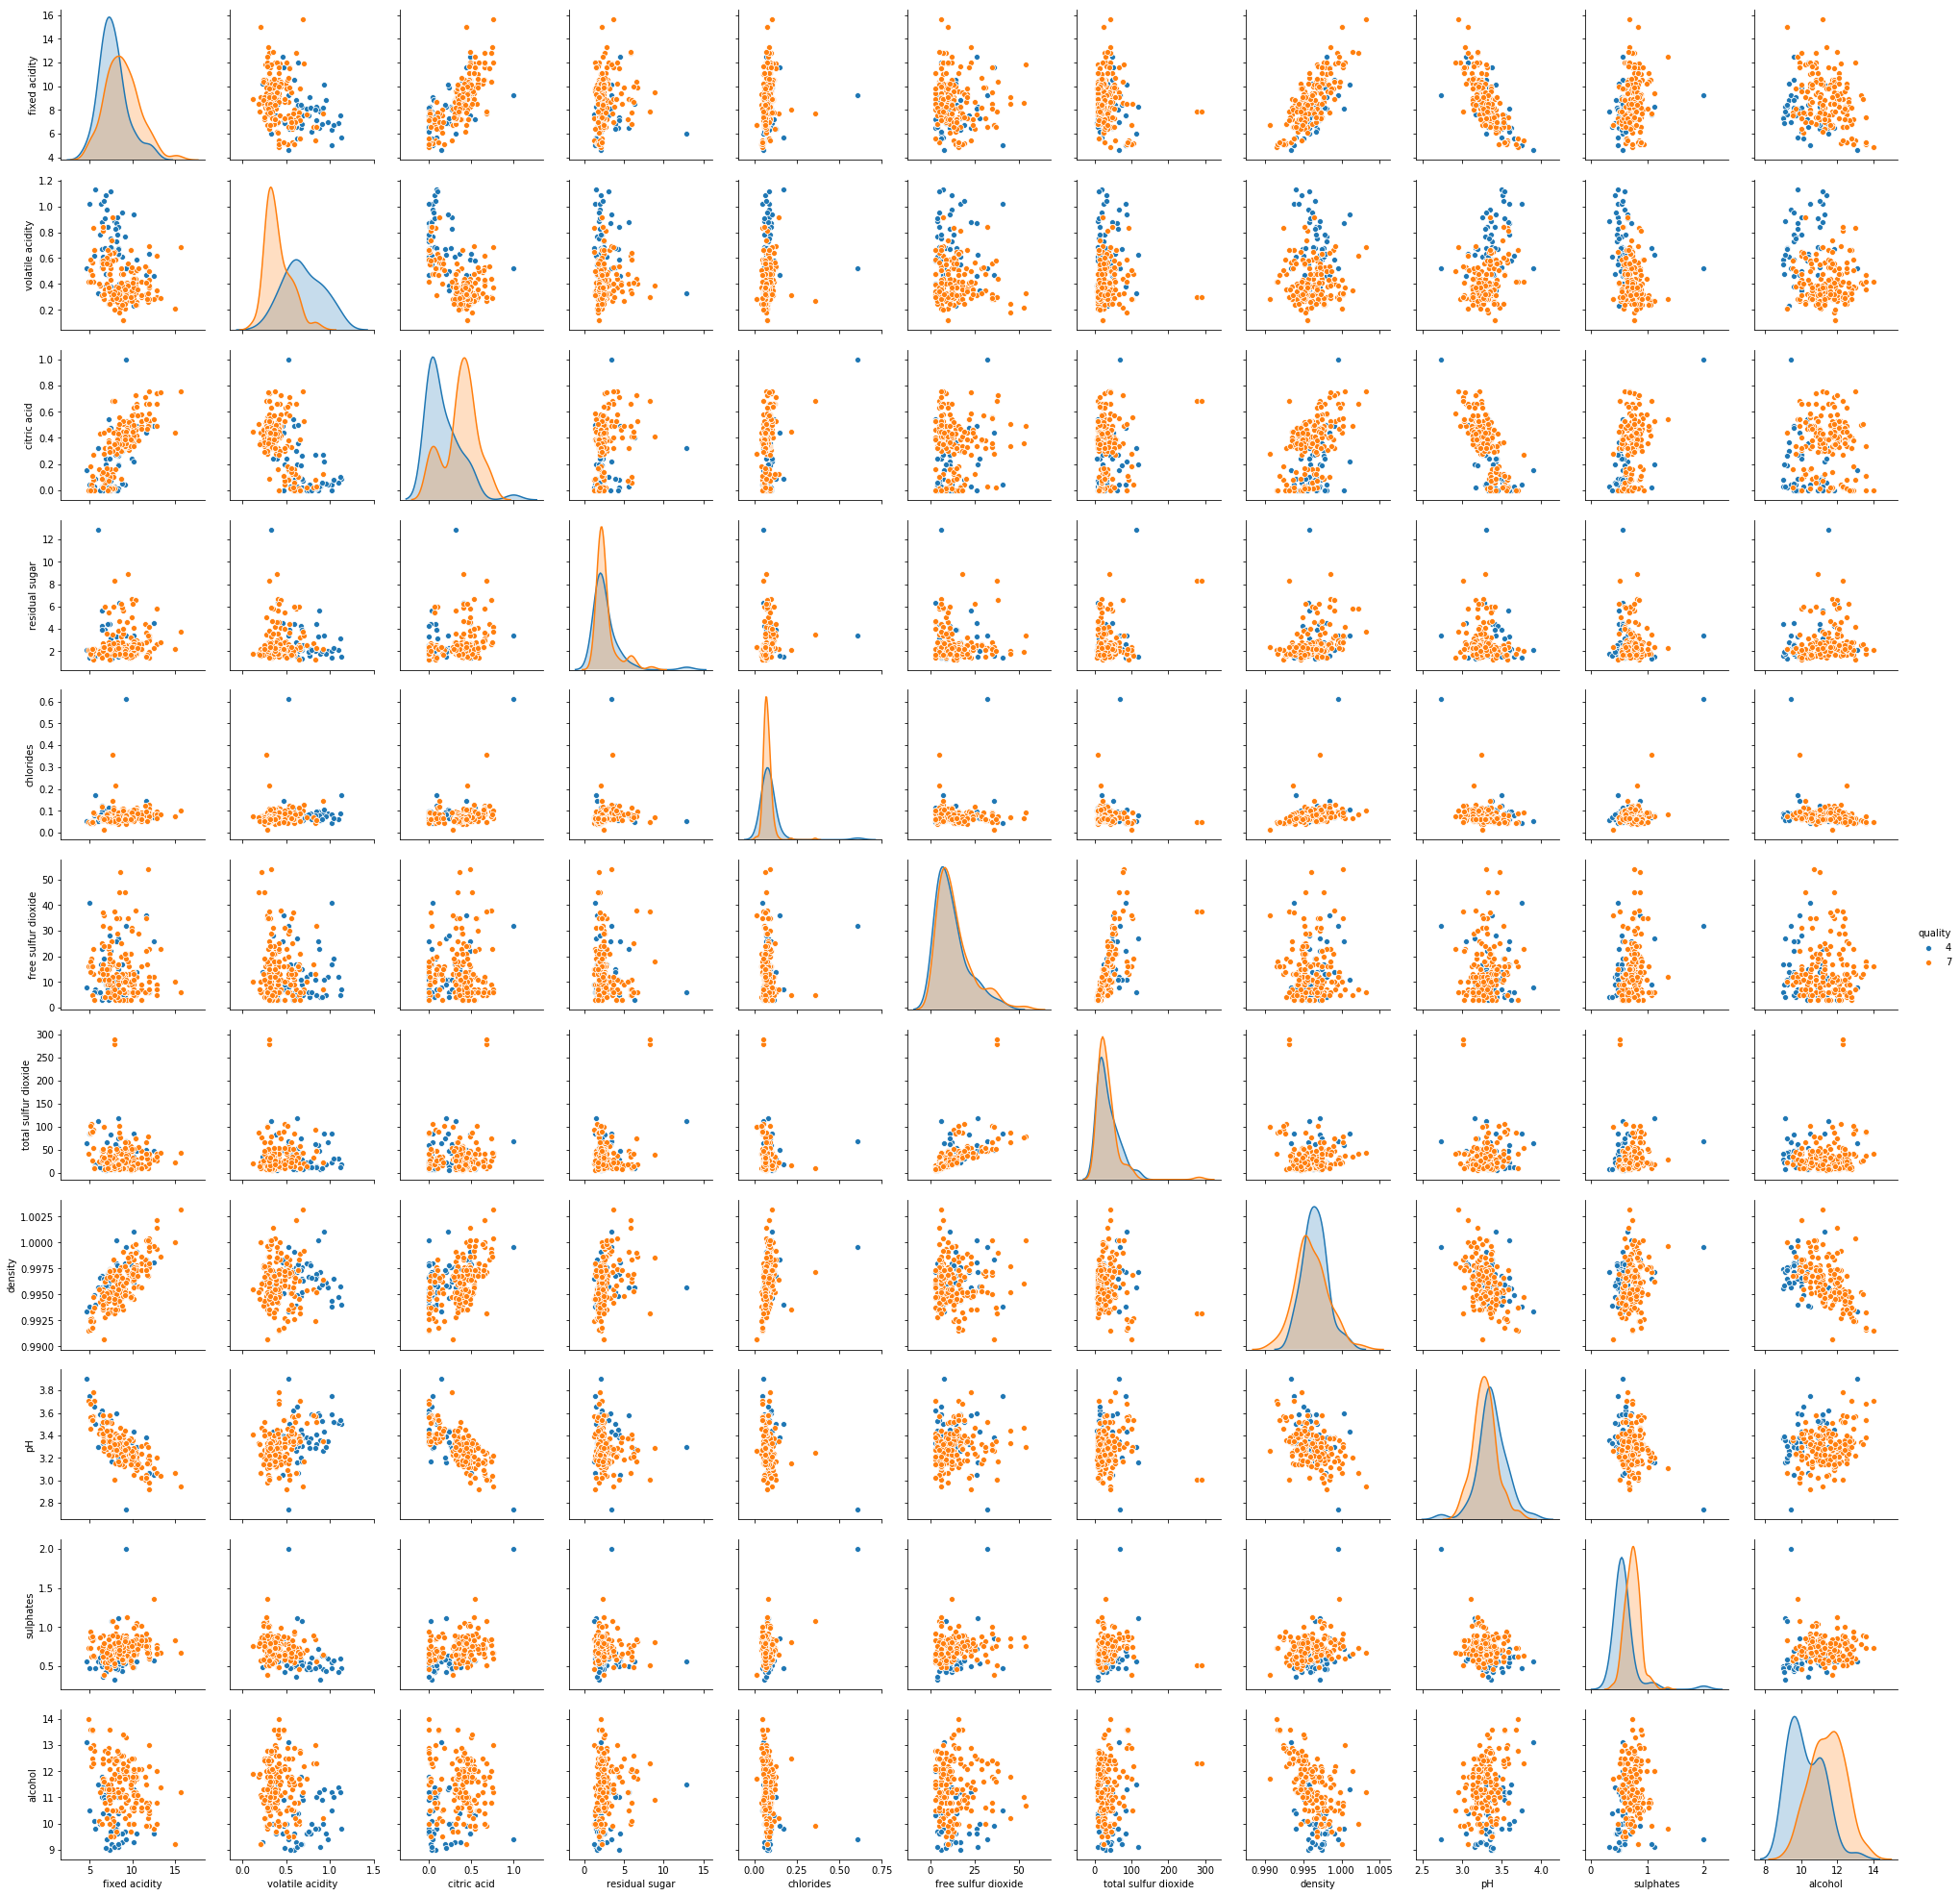

In [12]:
#plt.title('Pairwise relationships between independent variables of dataset')
sns.pairplot(data_47,hue='quality',vars=data_47.columns[:11],diag_kind='kde')

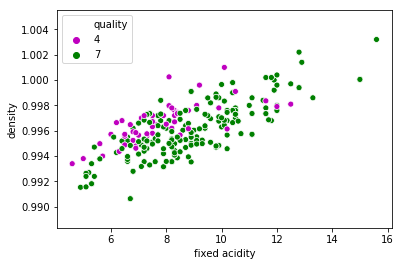

In [13]:
sns.scatterplot(x="fixed acidity", y="density", hue="quality", palette=["m", "g"], data=data_47)

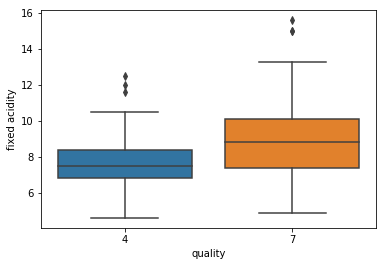

In [14]:
sns.boxplot(y="fixed acidity", x="quality",data=data_47)

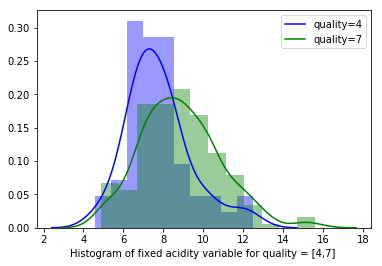

In [15]:
sns.distplot(data[data['quality']==4]['fixed acidity'],color='b',kde_kws = {"label":"quality=4"})
sns.distplot(data[data['quality']==7]['fixed acidity'],color='g',kde_kws = {"label":"quality=7"},
             axlabel='Histogram of fixed acidity variable for quality = [4,7] ')

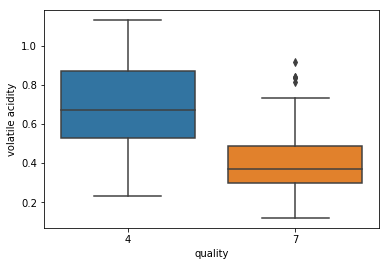

In [16]:
sns.boxplot(y="volatile acidity", x="quality",data=data_47)

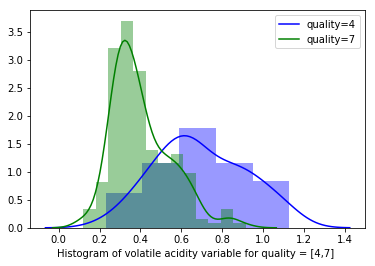

In [17]:
sns.distplot(data[data['quality']==4]['volatile acidity'],color='b',kde_kws = {"label":"quality=4"})
sns.distplot(data[data['quality']==7]['volatile acidity'],color='g',kde_kws = {"label":"quality=7"},
             axlabel='Histogram of volatile acidity variable for quality = [4,7] ')

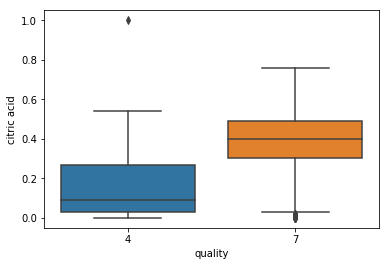

In [18]:
sns.boxplot(y="citric acid", x="quality",data=data_47)

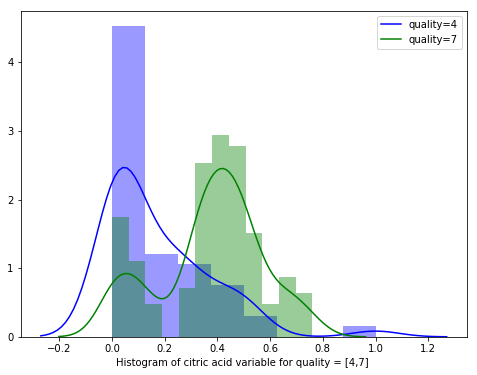

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(data[data['quality']==4]['citric acid'],color='b',kde_kws = {'label':'quality=4'})
sns.distplot(data[data['quality']==7]['citric acid'],color='g',kde_kws = {'label':'quality=7'},
             axlabel='Histogram of citric acid variable for quality = [4,7] ')

Shapes of histograms indicate multiple kernels. 

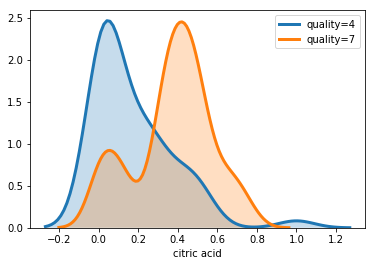

In [20]:
sns.distplot(data[data['quality']==4]['citric acid'],hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3},label='quality=4')
sns.distplot(data[data['quality']==7]['citric acid'],hist=False,kde=True,kde_kws = {'shade': True, 'linewidth': 3},label='quality=7')

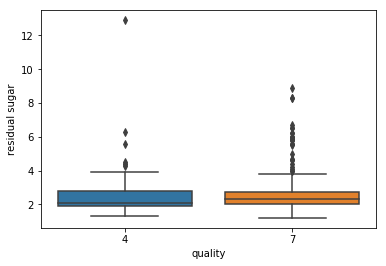

In [21]:
sns.boxplot(y="residual sugar", x="quality",data=data_47)

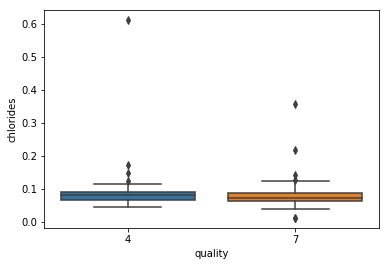

In [22]:
sns.boxplot(y="chlorides", x="quality",data=data_47)

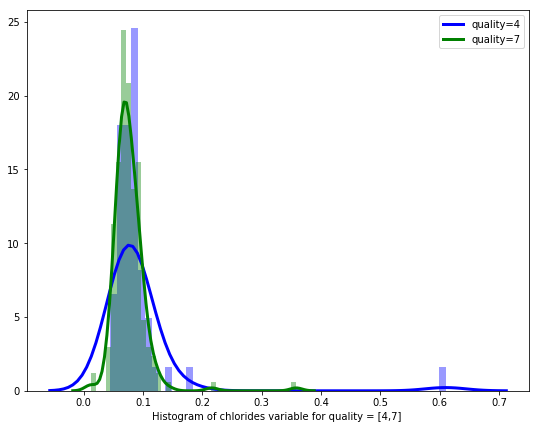

In [23]:
plt.figure(figsize=(9,7))
sns.distplot(data[data['quality']==4]['chlorides'],color='b',kde_kws = {"linewidth":3,"label":"quality=4"})
sns.distplot(data[data['quality']==7]['chlorides'],color='g',kde_kws = {"linewidth":3,"label":"quality=7"},
             axlabel='Histogram of chlorides variable for quality = [4,7] ')

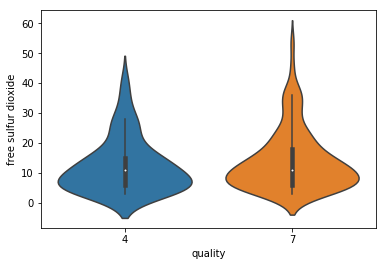

In [24]:
sns.violinplot(y="free sulfur dioxide", x="quality",data=data_47)

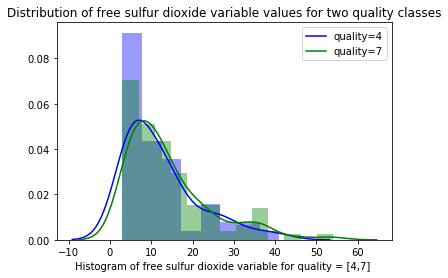

In [25]:
plt.title('Distribution of free sulfur dioxide variable values for two quality classes')
sns.distplot(data[data['quality']==4]['free sulfur dioxide'],color='b',kde_kws={"label":"quality=4"})
sns.distplot(data[data['quality']==7]['free sulfur dioxide'],color='g',kde_kws={"label":"quality=7"},
             axlabel='Histogram of free sulfur dioxide variable for quality = [4,7] ')

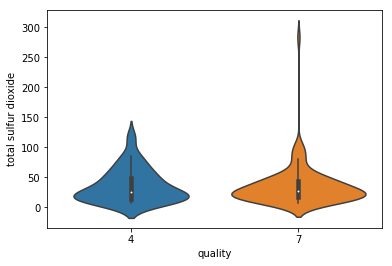

In [26]:
sns.violinplot(y="total sulfur dioxide", x="quality",data=data_47)

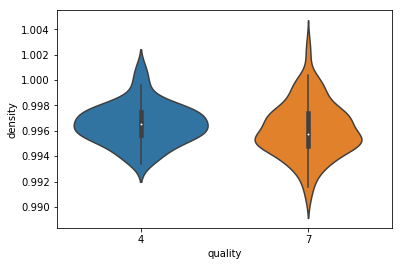

In [27]:
sns.violinplot(y="density", x="quality",data=data_47)

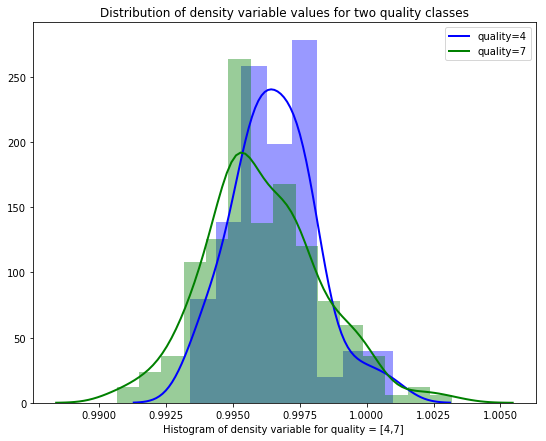

In [28]:
plt.figure(figsize=(9,7))
plt.title('Distribution of density variable values for two quality classes')
sns.distplot(data[data['quality']==4].density,color='b',kde_kws={"linewidth":2,"label":"quality=4"})
sns.distplot(data[data['quality']==7].density,color='g',kde_kws={"linewidth":2,"label":"quality=7"},
             axlabel='Histogram of density variable for quality = [4,7] ')

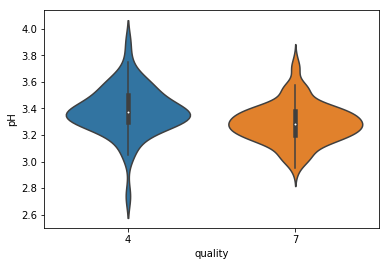

In [29]:
sns.violinplot(y="pH", x="quality",data=data_47)

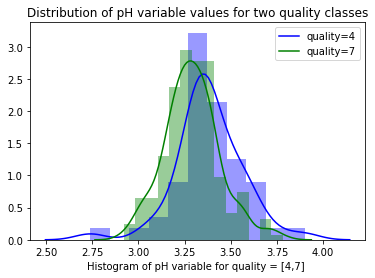

In [30]:
plt.title('Distribution of pH variable values for two quality classes')
sns.distplot(data[data['quality']==4].pH,color='b',kde_kws={"label":"quality=4"})
sns.distplot(data[data['quality']==7].pH,color='g',kde_kws={"label":"quality=7"},
             axlabel='Histogram of pH variable for quality = [4,7] ')

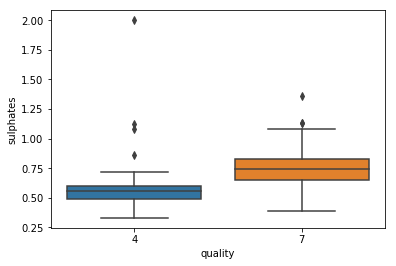

In [31]:
sns.boxplot(y="sulphates", x="quality",data=data_47)

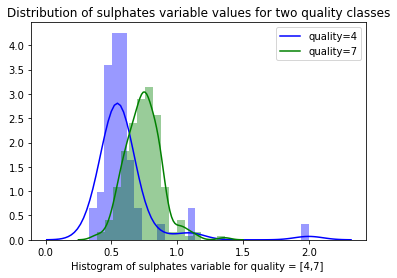

In [32]:
plt.title('Distribution of sulphates variable values for two quality classes')
sns.distplot(data[data['quality']==4].sulphates,color='b',kde_kws={"label":"quality=4"})
sns.distplot(data[data['quality']==7].sulphates,color='g',kde_kws={"label":"quality=7"},
             axlabel='Histogram of sulphates variable for quality = [4,7] ')

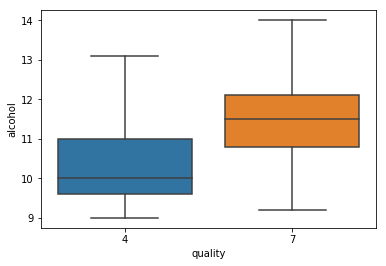

In [33]:
sns.boxplot(y="alcohol", x="quality",data=data_47)

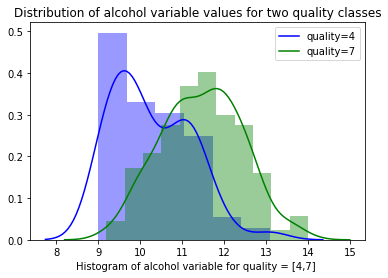

In [34]:
plt.title('Distribution of alcohol variable values for two quality classes')
sns.distplot(data[data['quality']==4].alcohol,color='b',kde_kws={"label":"quality=4"})
sns.distplot(data[data['quality']==7].alcohol,color='g',kde_kws={"label":"quality=7"},
             axlabel='Histogram of alcohol variable for quality = [4,7] ')

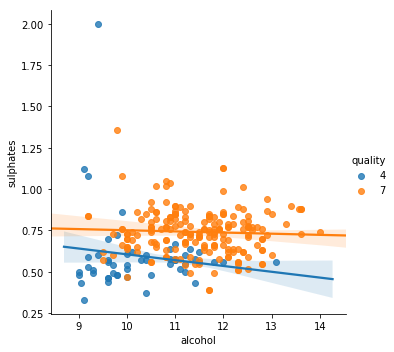

In [35]:
sns.lmplot(x="alcohol", y="sulphates", hue="quality",n_boot=10,data=data_47);

## Principal Component Analysis (PCA)
[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is linear dimensionality reduction using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space.

In [36]:
# PCA
X = data_47[data_47.columns[:11]]
y = data_47['quality']

In [37]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
scaled_d47 = scaler.transform(X)

In [39]:
pca = PCA(n_components=10)
pca.fit(scaled_d47)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [40]:
pca.components_

array([[ 0.47481504, -0.25687033,  0.46657262,  0.12392987,  0.21455365,
         0.00355208, -0.00984558,  0.37287981, -0.45259989,  0.26626302,
        -0.12080915],
       [-0.12095821, -0.35750397,  0.20581816,  0.15580864, -0.1405332 ,
         0.44157729,  0.49411057, -0.3165333 , -0.00146716,  0.2022892 ,
         0.43694489],
       [-0.02955318,  0.40468377, -0.13648022,  0.24172729,  0.16022305,
         0.47036328,  0.48721745,  0.30229781,  0.04636613, -0.08132657,
        -0.41696168],
       [-0.20276289,  0.02541081, -0.06823279, -0.47913644,  0.55899964,
         0.16950959, -0.08001092, -0.10150316,  0.12224745,  0.58736619,
        -0.07843363],
       [-0.19396224,  0.20535516,  0.03218823,  0.66238259,  0.47007445,
        -0.31415222, -0.05615676,  0.02632129,  0.12016816,  0.13069184,
         0.35410789],
       [-0.17476228, -0.0265893 ,  0.11344812, -0.08467969,  0.41841912,
        -0.10835244,  0.16964475, -0.48407022, -0.50320908, -0.46182521,
        -0.179

Display the amount and percentage of variance explained by each of the selected components

In [41]:
pca_exp_var = pd.DataFrame(pca.explained_variance_,columns=['amount of explained variance'])
pca_exp_var['percentage of explained variance'] = pca.explained_variance_ratio_
pca_exp_var

,amount of explained variance,percentage of explained variance
0,3.456326,0.312965
1,1.902141,0.172236
2,1.607089,0.145519
3,1.257365,0.113852
4,1.016207,0.092016
5,0.567301,0.051368
6,0.459599,0.041616
7,0.348088,0.031519
8,0.245696,0.022247
9,0.127632,0.011557


In [42]:
print(' Sum of pca.explained_variance_ratio_ is',pca.explained_variance_ratio_.sum())

 Sum of pca.explained_variance_ratio_ is 0.994894721041


In [43]:
d47_pca = pd.DataFrame(pca.components_,columns=X.columns)

Display the weights of each input variable (column) for each component (row) 

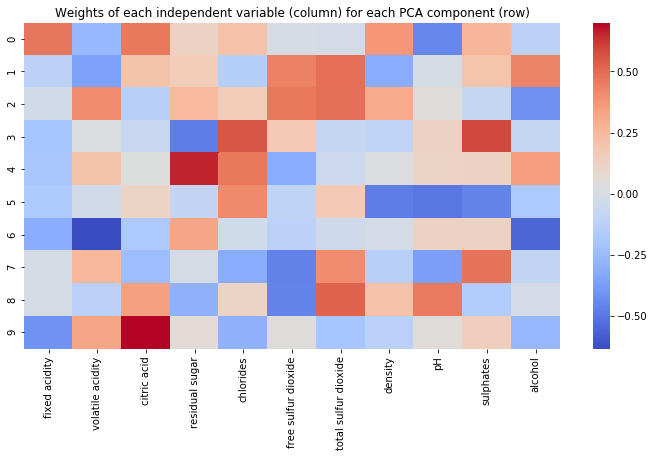

In [44]:
plt.figure(figsize=(12,6))
plt.title('Weights of each independent variable (column) for each PCA component (row)')
sns.heatmap(d47_pca,cmap='coolwarm',)

In [45]:
X = pca.transform(scaler.transform(X))
#y = data_47['quality']

Common function to display classification results.

In [46]:
def print_classificiation_reports(rtitle,y_true,y_pred,c_labels):
    assert len(y_true) != 0, 'y_true is empty!'
    assert len(y_pred) != 0, 'y_pred is empty!'
    assert len(y_true) == len(y_pred), 'Lengths of y_true and y_pred do not match!'
    
    c_mtx = confusion_matrix(y_true,y_pred,labels=c_labels)
    df_c_mtx = pd.DataFrame(data=c_mtx,index=c_labels,columns=c_labels)
    print(rtitle)
    print('Confusion Matrix for classes',c_labels)
    print(df_c_mtx)
    print('\n')
    print(classification_report(y_true,y_pred))

Keep track of each method's performance indicators.

In [47]:
cls_kpis = ['precision','recall','f1-score']
cls_results=pd.DataFrame(index=cls_kpis)

## Training and Test data

Split data into training and test datasets.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=91)

## Logistic Regression
[Logistic Regression classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [49]:
clf_logmodel = LogisticRegression()
clf_logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluation

Let's check the performance of model with training data.

In [50]:
c_labels = [4,7]
pred = clf_logmodel.predict(X_train)
print_classificiation_reports("LogisticRegression: Report for Training data",y_train,pred,c_labels)

LogisticRegression: Report for Training data
Confusion Matrix for classes [4, 7]
    4    7
4  26    9
7   5  136


             precision    recall  f1-score   support

          4       0.84      0.74      0.79        35
          7       0.94      0.96      0.95       141

avg / total       0.92      0.92      0.92       176



Let's evaluate the performance of model with test data.

In [51]:
pred = clf_logmodel.predict(X_test)
print_classificiation_reports("LogisticRegression: Report for Test data",y_test,pred,c_labels)

LogisticRegression: Report for Test data
Confusion Matrix for classes [4, 7]
    4   7
4  10   8
7   1  57


             precision    recall  f1-score   support

          4       0.91      0.56      0.69        18
          7       0.88      0.98      0.93        58

avg / total       0.88      0.88      0.87        76



In [52]:
d = {'Logistic Regression':precision_recall_fscore_support(y_test, pred, average='weighted')[:3]}
c = pd.DataFrame(data=d,index=cls_kpis)
cls_results=pd.concat([cls_results,c],axis=1)
cls_results

,Logistic Regression
precision,0.884542
recall,0.881579
f1-score,0.870656


## Decision Tree
[DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classifier.

In [53]:
clf_dtree = DecisionTreeClassifier()
clf_dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Evaluation

Let's check the performance of model with training data.

In [54]:
c_labels = [4,7]
pred = clf_dtree.predict(X_train)
print_classificiation_reports("Decision Tree Classifier: Report for Training data",y_train,pred,c_labels)

Decision Tree Classifier: Report for Training data
Confusion Matrix for classes [4, 7]
    4    7
4  35    0
7   0  141


             precision    recall  f1-score   support

          4       1.00      1.00      1.00        35
          7       1.00      1.00      1.00       141

avg / total       1.00      1.00      1.00       176



Let's evaluate the performance of model with test data.

In [55]:
pred = clf_dtree.predict(X_test)
print_classificiation_reports("Decision Tree Classifier: Report for Test data",y_test,pred,c_labels)

Decision Tree Classifier: Report for Test data
Confusion Matrix for classes [4, 7]
   4   7
4  9   9
7  2  56


             precision    recall  f1-score   support

          4       0.82      0.50      0.62        18
          7       0.86      0.97      0.91        58

avg / total       0.85      0.86      0.84        76



In [56]:
d = {'Decision Tree':precision_recall_fscore_support(y_test, pred, average='weighted')[:3]}
c = pd.DataFrame(data=d,index=cls_kpis)
cls_results=pd.concat([cls_results,c],axis=1)
cls_results

,Logistic Regression,Decision Tree
precision,0.884542,0.851270
recall,0.881579,0.855263
f1-score,0.870656,0.841913


## Random Forest
[RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging. <br>
Default value of [Bootstrap](https://en.wikipedia.org/wiki/Bootstrapping#Statistics) is True. 

In [57]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
rf_feat_importance = pd.DataFrame(clf_rf.feature_importances_,columns=['feature importance'])
rf_feat_importance

,feature importance
0,0.123334
1,0.279826
2,0.160523
3,0.065552
4,0.050767
5,0.062720
6,0.044943
7,0.074834
8,0.073779
9,0.063725


## Evaluation

Let's check the performance of model with training data.

In [59]:
c_labels = [4,7]
pred = clf_rf.predict(X_train)
print_classificiation_reports("Random Forest: Report for Training data",y_train,pred,c_labels)

Random Forest: Report for Training data
Confusion Matrix for classes [4, 7]
    4    7
4  35    0
7   0  141


             precision    recall  f1-score   support

          4       1.00      1.00      1.00        35
          7       1.00      1.00      1.00       141

avg / total       1.00      1.00      1.00       176



Let's evaluate the performance of model with test data.

In [60]:
pred = clf_rf.predict(X_test)
print_classificiation_reports("Random Forest: Report for Test data",y_test,pred,c_labels)

Random Forest: Report for Test data
Confusion Matrix for classes [4, 7]
   4   7
4  7  11
7  0  58


             precision    recall  f1-score   support

          4       1.00      0.39      0.56        18
          7       0.84      1.00      0.91        58

avg / total       0.88      0.86      0.83        76



In [61]:
d = {'Random Forest':precision_recall_fscore_support(y_test, pred, average='weighted')[:3]}
c = pd.DataFrame(data=d,index=cls_kpis)
cls_results=pd.concat([cls_results,c],axis=1)
cls_results

,Logistic Regression,Decision Tree,Random Forest
precision,0.884542,0.851270,0.878337
recall,0.881579,0.855263,0.855263
f1-score,0.870656,0.841913,0.829689
